# <font color=BLUE>IBM EMPLOYEE ATTRITION DATA ANALYTICS</font>

Why do workers resign from the positions they hold? Can employee attrition be anticipated? Can companies take steps to prevent high employee turn-over? Employee attrition is the reduction of staff by voluntary or involuntary reasons. These can be through natural means like retirement, or it can be through resignation, termination of contract, or when a company decides to make a position redundant. Excessive involuntary attrition can be detrimental to the overal business goals, and can lead to understaffing, increased job burden on remaining employees, and harmful consequences to company reputation.

You’ve just been hired by IBM to work in their Data Analytics sector. On your second day, you are given a dataset from HR that includes several records of employees that were with the company in the prior calendar year. Since the development of the dataset, some of those employees have since resigned from their positions. The company was surprised with the recent level of turnover and have tasked you with digging into the data to determine any insights about what leads to employee turnover, and alternatively, what aspects of the jobs can be protected to reduce employee turnover.

Using the ‘IBM Employee Attrition’ dataset – your role is to comprehensively
explore the data and generate meaningful insights into what the data is presenting.

You should conclude your assignment with 3 recommendations you will make to the
HR department regarding employee attrition.

At the least, you should complete the following tasks:

* Data prep and cleaning – prior to exploring the data, you should ensure that the dataset is clean, all variables are in their proper format, and the data is free of missing, abnormal, or outlier values.

* Exploratory data analysis – you should explore every aspect of the data to determine the features of the data, the range of values for all variables of interest, and the relationships between variables. Exploration should be conducted outside of predictive modeling – in other words, you are not only interested in how the dependent and independent variables interact – you should also spend some time exploring variations in the data among variables (i.e. how does salary differ between genders? Does time spent in the company differ by job role?)
* Modeling – after thoroughly exploring the data, create a logistic regression model that predicts employee attrition based on the other variables available to you. Clearly interpret your model findings. Re-run/tweak your model if you think you can find a better fit.
* Visualization – Create at least 3 visualizations that highlight some of the most interesting findings in your dataset. These can be findings from theregression model or any interesting relationships between variables. Good luck!


In [204]:
# Importing all the Libraries I need for this project.

import pandas as pd
import numpy as np

import scipy.stats as stats
import statsmodels.formula.api as sm

from matplotlib import pyplot as plt
%matplotlib inline 
 
import seaborn as sns

# I will include below codes when importing my libraries

pd.set_option('display.max_columns', None) # shows all the columns in dataset
pd.set_option('display.max_rows', None) ## shows all rows in dataset

In [205]:
df = pd.read_excel("IBM Employee Attrition.xlsx") # Importing IBM Employee Attrition file


df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


### <font color=GOLDENROD>Understanding Data and Cleaning It.</font>

In [206]:
# Before Exploring the Data the first thing to do is to make sure dataset is clean
# I will check to make sure all variables are in theri proper format and that data is free
# of missing, abnormal, and/or outlier values

In [207]:
df.info() # Checking to see how many Colums and Rows are in the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [208]:
# Checking to see if there are any null in the dataset There are no null columns in this case there is none

df.isnull().sum() 

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [209]:
# Checking to see if there are Outlier and Removing them
# I am going to use the z-score method to outlier identification and removal 

# I am starting by checking out the shape in this case there are 30 Colums and 1470 Rows

print ("starting shape:", df.shape)

starting shape: (1470, 30)


In [210]:
# Calculate zscores

df["zscore_Age"] = np.abs(stats.zscore(df["Age"]))
df["zscore_DistanceFromHome"] = np.abs(stats.zscore(df["DistanceFromHome"]))
df["zscore_Education"] = np.abs(stats.zscore(df["Education"]))
df["zscore_EmployeeNumber"] = np.abs(stats.zscore(df["EmployeeNumber"]))
df["zscore_EnvironmentSatisfaction"] = np.abs(stats.zscore(df["EnvironmentSatisfaction"]))
df["zscore_JobInvolvement"] = np.abs(stats.zscore(df["JobInvolvement"]))
df["zscore_JobLevel"] = np.abs(stats.zscore(df["JobLevel"]))
df["zscore_JobSatisfaction"] = np.abs(stats.zscore(df["JobSatisfaction"]))
df["zscore_MonthlyIncome"] = np.abs(stats.zscore(df["MonthlyIncome"]))
df["zscore_NumCompaniesWorked"] = np.abs(stats.zscore(df["NumCompaniesWorked"]))
df["zscore_PercentSalaryHike"] = np.abs(stats.zscore(df["PercentSalaryHike"]))
df["zscore_PerformanceRating"] = np.abs(stats.zscore(df["PerformanceRating"]))
df["zscore_RelationshipSatisfaction"] = np.abs(stats.zscore(df["RelationshipSatisfaction"]))
df["zscore_StockOptionLevel"] = np.abs(stats.zscore(df["StockOptionLevel"]))
df["zscore_TotalWorkingYears"] = np.abs(stats.zscore(df["TotalWorkingYears"]))
df["zscore_TrainingTimesLastYear"] = np.abs(stats.zscore(df["TrainingTimesLastYear"]))
df["zscore_WorkLifeBalance"] = np.abs(stats.zscore(df["WorkLifeBalance"]))
df["zscore_YearsAtCompany"] = np.abs(stats.zscore(df["YearsAtCompany"]))
df["zscore_YearsInCurrentRole"] = np.abs(stats.zscore(df["YearsInCurrentRole"]))
df["zscore_YearsSinceLastPromotion"] = np.abs(stats.zscore(df["YearsSinceLastPromotion"]))
df["zscore_YearsWithCurrManager"] = np.abs(stats.zscore(df["YearsWithCurrManager"]))


In [211]:
## 
Age_outliers = df[df["zscore_Age"] > 3].index
df = df.drop(Age_outliers)

## 
DistanceFromHome_outliers = df[df["zscore_DistanceFromHome"] > 3].index
df = df.drop(DistanceFromHome_outliers)

## 
Education_outliers = df[df["zscore_Education"] > 3].index
df = df.drop(Education_outliers)

## 
EmployeeNumber_outliers = df[df["zscore_EmployeeNumber"] > 3].index
df = df.drop(EmployeeNumber_outliers)

## 
EnvironmentSatisfaction_outliers = df[df["zscore_EnvironmentSatisfaction"] > 3].index
df = df.drop(EnvironmentSatisfaction_outliers)

## 
JobInvolvement_outliers = df[df["zscore_JobInvolvement"] > 3].index
df = df.drop(JobInvolvement_outliers)

## 
JobSatisfaction_outliers = df[df["zscore_JobSatisfaction"] > 3].index
df = df.drop(JobSatisfaction_outliers)

## 
JobLevel_outliers = df[df["zscore_JobLevel"] > 3].index
df = df.drop(JobLevel_outliers)

## 
MonthlyIncome_outliers = df[df["zscore_MonthlyIncome"] > 3].index
df = df.drop(MonthlyIncome_outliers)

## 
NumCompaniesWorked_outliers = df[df["zscore_NumCompaniesWorked"] > 3].index
df = df.drop(NumCompaniesWorked_outliers)

## 
PercentSalaryHike_outliers = df[df["zscore_PercentSalaryHike"] > 3].index
df = df.drop(PercentSalaryHike_outliers)

## 
PerformanceRating_outliers = df[df["zscore_PerformanceRating"] > 3].index
df = df.drop(PerformanceRating_outliers)

## 
RelationshipSatisfaction_outliers = df[df["zscore_RelationshipSatisfaction"] > 3].index
df = df.drop(RelationshipSatisfaction_outliers)

## 
StockOptionLevel_outliers = df[df["zscore_StockOptionLevel"] > 3].index
df = df.drop(StockOptionLevel_outliers)

## 
TotalWorkingYears_outliers = df[df["zscore_TotalWorkingYears"] > 3].index
df = df.drop(TotalWorkingYears_outliers)

## 
TrainingTimesLastYear_outliers = df[df["zscore_TrainingTimesLastYear"] > 3].index
df = df.drop(TrainingTimesLastYear_outliers)

## 
WorkLifeBalance_outliers = df[df["zscore_WorkLifeBalance"] > 3].index
df = df.drop(WorkLifeBalance_outliers)

## 
YearsAtCompany_outliers = df[df["zscore_YearsAtCompany"] > 3].index
df = df.drop(YearsAtCompany_outliers)

## 
YearsInCurrentRole_outliers = df[df["zscore_YearsInCurrentRole"] > 3].index
df = df.drop(YearsInCurrentRole_outliers)

## 
YearsWithCurrManager_outliers = df[df["zscore_YearsWithCurrManager"] > 3].index
df = df.drop(YearsWithCurrManager_outliers)

In [212]:
# Dropping zscore columns

df.drop(columns=["zscore_Age", "zscore_DistanceFromHome", "zscore_Education", "zscore_EmployeeNumber",
                 "zscore_EnvironmentSatisfaction", "zscore_JobInvolvement", "zscore_JobLevel", 
                 "zscore_JobSatisfaction", "zscore_MonthlyIncome", "zscore_NumCompaniesWorked", 
                 "zscore_PercentSalaryHike", "zscore_PerformanceRating", "zscore_RelationshipSatisfaction", 
                 "zscore_StockOptionLevel", "zscore_TotalWorkingYears", "zscore_TrainingTimesLastYear", 
                 "zscore_WorkLifeBalance", "zscore_YearsAtCompany", "zscore_YearsInCurrentRole", 
                 "zscore_YearsWithCurrManager"], inplace = True)


print ("shape after outliers removed:", df.shape) # Dataset Shape after removing all the outliers

shape after outliers removed: (1412, 31)


# <font color=GOLDENROD>Data Exploration </font>

In [213]:
# At this stage I begin exploring all the aspect of the data by determining it's feature like, 
# The range of values for all variables of interest, and the relationships between variables. 
# Exploration should be conducted outside of predictive modeling – in other words, 
# you are not only interested in how the dependent and independent variables interact – 
# you should also spend some time exploring variations in the data among variables 
#(i.e. how does salary differ between genders? Does time spent in the company differ by job role?)

In [214]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.679146
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,0.368715
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.679146
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.252146
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,0.058285


In [215]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_YearsSinceLastPromotion
count,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000
mean,36.400850,9.161473,2.895184,1027.644476,2.725921,2.730878,1.987252,2.737252,6159.564448,2.683428,15.214589,3.152975,2.711048,0.798159,10.529745,2.801700,2.760623,6.356232,3.984419,1.980170,3.878187,0.682873
std,8.855927,8.071315,1.020168,603.014048,1.087566,0.709225,1.041918,1.101999,4372.270866,2.500389,3.633061,0.360090,1.080104,0.859959,6.864888,1.288469,0.706902,5.015908,3.358738,2.911821,3.310641,0.595463
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.058285
25%,30.000000,2.000000,2.000000,490.250000,2.000000,2.000000,1.000000,2.000000,2861.250000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.368715
50%,35.000000,7.000000,3.000000,1025.500000,3.000000,3.000000,2.000000,3.000000,4783.000000,2.000000,14.000000,3.000000,3.000000,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.679146
75%,42.000000,14.000000,4.000000,1560.500000,4.000000,3.000000,2.000000,4.000000,7626.750000,4.000000,18.000000,3.000000,4.000000,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.679146
max,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19943.000000,9.000000,25.000000,4.000000,4.000000,3.000000,34.000000,6.000000,4.000000,25.000000,15.000000,15.000000,14.000000,3.977310


In [216]:
df["Age"].value_counts()

35    77
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    57
40    56
37    49
27    48
28    48
42    44
39    42
45    40
26    39
41    36
43    31
46    30
44    30
24    26
25    26
50    24
49    22
47    22
48    18
22    16
54    16
55    16
53    16
51    15
23    14
52    14
21    13
20    11
56    10
58    10
59     9
19     9
18     8
57     4
60     4
Name: Age, dtype: int64

In [217]:
df["Attrition"].value_counts()

No     1179
Yes     233
Name: Attrition, dtype: int64

In [218]:
df["BusinessTravel"].value_counts()

Travel_Rarely        997
Travel_Frequently    270
Non-Travel           145
Name: BusinessTravel, dtype: int64

In [219]:
df["Department"].value_counts()

Research & Development    925
Sales                     428
Human Resources            59
Name: Department, dtype: int64

In [220]:
# Employees who leave 1, 2, 10, 9, 3, 7, 8... have the most.

df["DistanceFromHome"].value_counts()

1     203
2     200
10     84
9      81
3      80
7      78
8      77
5      64
4      62
6      56
16     32
11     29
24     28
15     26
23     25
29     25
25     24
18     24
20     24
19     22
26     22
28     22
12     20
17     20
14     19
13     19
21     18
22     16
27     12
Name: DistanceFromHome, dtype: int64

In [221]:
df["Education"].value_counts()

3    549
4    379
2    277
1    166
5     41
Name: Education, dtype: int64

In [222]:
df["EducationField"].value_counts()

Life Sciences       580
Medical             446
Marketing           152
Technical Degree    129
Other                79
Human Resources      26
Name: EducationField, dtype: int64

In [223]:
df["EmployeeNumber"].value_counts()

1       1
1288    1
1395    1
1394    1
1392    1
1391    1
1390    1
1389    1
1387    1
1383    1
1382    1
1380    1
1379    1
1377    1
1375    1
1374    1
1372    1
1371    1
1369    1
1368    1
1367    1
1396    1
1397    1
1399    1
1417    1
1427    1
1425    1
1424    1
1423    1
1422    1
1421    1
1420    1
1419    1
1415    1
1401    1
1412    1
1411    1
1409    1
1408    1
1407    1
1405    1
1403    1
1402    1
1364    1
1363    1
1362    1
1303    1
1312    1
1311    1
1310    1
1309    1
1308    1
1307    1
1306    1
1304    1
1301    1
1315    1
1299    1
1298    1
1297    1
1296    1
1295    1
1294    1
1292    1
1291    1
1314    1
1317    1
1361    1
1340    1
1360    1
1358    1
1356    1
1355    1
1350    1
1349    1
1346    1
1344    1
1336    1
1318    1
1334    1
1333    1
1331    1
1329    1
1324    1
1322    1
1321    1
1319    1
1428    1
1430    1
1431    1
1513    1
1529    1
1527    1
1525    1
1522    1
1520    1
1516    1
1515    1
1514    1
1509    1


In [224]:
df["EnvironmentSatisfaction"].value_counts()

3    441
4    426
2    277
1    268
Name: EnvironmentSatisfaction, dtype: int64

In [225]:
df["Gender"].value_counts()

Male      848
Female    564
Name: Gender, dtype: int64

In [226]:
df["JobInvolvement"].value_counts()

3    834
2    362
4    138
1     78
Name: JobInvolvement, dtype: int64

In [227]:
df["JobLevel"].value_counts()

1    541
2    531
3    208
4     81
5     51
Name: JobLevel, dtype: int64

In [228]:
df["JobRole"].value_counts()

Sales Executive              319
Research Scientist           291
Laboratory Technician        255
Manufacturing Director       141
Healthcare Representative    127
Sales Representative          83
Manager                       77
Research Director             67
Human Resources               52
Name: JobRole, dtype: int64

In [229]:
df["JobSatisfaction"].value_counts()

4    445
3    426
1    275
2    266
Name: JobSatisfaction, dtype: int64

In [230]:
df["MaritalStatus"].value_counts()

Married     645
Single      454
Divorced    313
Name: MaritalStatus, dtype: int64

In [231]:
df["MonthlyIncome"].value_counts()

2342     4
6142     3
2451     3
3452     3
5562     3
2380     3
2741     3
2610     3
2404     3
2559     3
6347     3
2187     2
2127     2
2942     2
2936     2
2973     2
2033     2
4941     2
3162     2
4284     2
2096     2
5993     2
5204     2
6272     2
5346     2
5343     2
2044     2
17328    2
3294     2
2377     2
2008     2
3420     2
2956     2
2073     2
2042     2
5238     2
6811     2
5484     2
2439     2
2515     2
2657     2
6804     2
2782     2
4876     2
4898     2
2340     2
2372     2
5410     2
2720     2
5405     2
2362     2
10609    2
2177     2
3904     2
2450     2
6500     2
4639     2
2070     2
6397     2
3760     2
2500     2
4724     2
3072     2
5561     2
4779     2
5467     2
2996     2
2323     2
5769     2
5605     2
2587     2
4968     2
2109     2
5228     2
2436     2
5473     2
2911     2
4197     2
2028     2
10096    2
9980     2
2406     2
6162     2
4014     2
17861    2
2269     2
2132     2
2564     2
7756     2
4011     2
4148     2

In [232]:
df["NumCompaniesWorked"].value_counts()

1    502
0    192
3    150
2    140
4    132
6     69
7     69
5     61
9     51
8     46
Name: NumCompaniesWorked, dtype: int64

In [233]:
df["Over18"].value_counts() # At this point in time IBM has no employee under the age of 18

Y    1412
Name: Over18, dtype: int64

In [234]:
df["OverTime"].value_counts()

No     1012
Yes     400
Name: OverTime, dtype: int64

In [235]:
df["PercentSalaryHike"].value_counts()

13    204
11    196
14    194
12    190
15     96
18     85
17     80
16     76
19     75
20     54
22     54
21     47
23     26
24     20
25     15
Name: PercentSalaryHike, dtype: int64

In [236]:
df["PerformanceRating"].value_counts()

3    1196
4     216
Name: PerformanceRating, dtype: int64

In [237]:
df["RelationshipSatisfaction"].value_counts()

3    443
4    413
2    291
1    265
Name: RelationshipSatisfaction, dtype: int64

In [238]:
df["StockOptionLevel"].value_counts()

0    609
1    563
2    156
3     84
Name: StockOptionLevel, dtype: int64

In [239]:
df["TotalWorkingYears"].value_counts()

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     32
17     32
2      31
14     31
18     26
20     25
19     22
23     20
22     18
24     15
25     13
26     12
0      11
28     11
30      7
29      7
31      6
32      6
27      6
33      2
34      1
Name: TotalWorkingYears, dtype: int64

In [240]:
df["TrainingTimesLastYear"].value_counts()

2    528
3    469
4    120
5    112
1     69
6     64
0     50
Name: TrainingTimesLastYear, dtype: int64

In [241]:
df["WorkLifeBalance"].value_counts()

3    857
2    331
4    147
1     77
Name: WorkLifeBalance, dtype: int64

In [242]:
df["YearsAtCompany"].value_counts()

5     195
1     171
3     128
2     127
10    116
4     110
7      88
9      81
8      80
6      75
0      44
11     32
13     24
20     21
15     20
14     18
12     14
22     12
16     11
21     11
19      8
18      8
17      7
24      5
25      4
23      2
Name: YearsAtCompany, dtype: int64

In [243]:
df["YearsInCurrentRole"].value_counts()

2     371
0     243
7     216
3     133
4     103
8      85
9      58
1      57
5      35
6      30
10     24
11     21
13     13
12     10
14      8
15      5
Name: YearsInCurrentRole, dtype: int64

In [244]:
df["YearsSinceLastPromotion"].value_counts()

0     573
1     351
2     155
7      72
4      57
3      51
5      41
6      31
8      17
9      17
11     17
12      8
13      6
14      6
15      5
10      5
Name: YearsSinceLastPromotion, dtype: int64

In [245]:
df["YearsWithCurrManager"].value_counts()

2     343
0     261
7     207
3     142
8     101
4      96
1      76
9      55
5      31
6      26
10     23
11     20
12     16
13     11
14      4
Name: YearsWithCurrManager, dtype: int64

In [250]:
## Attrition & Age

pd.crosstab(df["Age"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
Age,,,
18,4,4,8
19,3,6,9
20,5,6,11
21,7,6,13
22,11,5,16
23,10,4,14
24,19,7,26
25,20,6,26
26,27,12,39


In [252]:
# Attrition & Business Travel

pd.crosstab(df["BusinessTravel"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
BusinessTravel,,,
Non-Travel,133,12,145
Travel_Frequently,201,69,270
Travel_Rarely,845,152,997
All,1179,233,1412


In [253]:
## Attrition & Department

pd.crosstab(df["Department"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
Department,,,
Human Resources,47,12,59
Research & Development,795,130,925
Sales,337,91,428
All,1179,233,1412


In [254]:
## Attrition & Distance From Home 

pd.crosstab(df["DistanceFromHome"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
DistanceFromHome,,,
1,177,26,203
2,175,25,200
3,66,14,80
4,53,9,62
5,54,10,64
6,49,7,56
7,67,11,78
8,67,10,77
9,63,18,81


In [256]:
# Attrition & Education

pd.crosstab(df["Education"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
Education,,,
1,136,30,166
2,233,44,277
3,450,99,549
4,323,56,379
5,37,4,41
All,1179,233,1412


In [258]:
## Attrition & EducationField

pd.crosstab(df["EducationField"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
EducationField,,,
Human Resources,19,7,26
Life Sciences,492,88,580
Marketing,118,34,152
Medical,384,62,446
Other,68,11,79
Technical Degree,98,31,129
All,1179,233,1412


In [260]:
## Attrition & EnvironmentSatisfaction

pd.crosstab(df["EnvironmentSatisfaction"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
EnvironmentSatisfaction,,,
1,197,71,268
2,234,43,277
3,380,61,441
4,368,58,426
All,1179,233,1412


In [261]:
## Attrition & Gender

pd.crosstab(df["Gender"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
Gender,,,
Female,480,84,564
Male,699,149,848
All,1179,233,1412


In [262]:
## Attrition & JobInvolvement

pd.crosstab(df["JobInvolvement"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
JobInvolvement,,,
1,51,27,78
2,292,70,362
3,711,123,834
4,125,13,138
All,1179,233,1412


In [263]:
## Attrition & JobLevel

pd.crosstab(df["JobLevel"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
JobLevel,,,
1,398,143,541
2,479,52,531
3,178,30,208
4,76,5,81
5,48,3,51
All,1179,233,1412


In [264]:
## Attrition & JobRole

pd.crosstab(df["JobRole"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
JobRole,,,
Healthcare Representative,119,8,127
Human Resources,40,12,52
Laboratory Technician,193,62,255
Manager,73,4,77
Manufacturing Director,132,9,141
Research Director,66,1,67
Research Scientist,244,47,291
Sales Executive,262,57,319
Sales Representative,50,33,83


In [266]:
## Attrition & JobSatisfaction

pd.crosstab(df["JobSatisfaction"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
JobSatisfaction,,,
1,209,66,275
2,221,45,266
3,353,73,426
4,396,49,445
All,1179,233,1412


In [267]:
## Attrition & MaritalStatus

pd.crosstab(df["MaritalStatus"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
MaritalStatus,,,
Divorced,280,33,313
Married,564,81,645
Single,335,119,454
All,1179,233,1412


In [268]:
## Attrition & MonthlyIncome

pd.crosstab(df["MonthlyIncome"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
MonthlyIncome,,,
1009,0,1,1
1051,1,0,1
1052,1,0,1
1081,0,1,1
1091,0,1,1
1102,0,1,1
1118,0,1,1
1129,1,0,1
1200,1,0,1


In [269]:
## Attrition & NumCompaniesWorked

pd.crosstab(df["NumCompaniesWorked"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
NumCompaniesWorked,,,
0,170,22,192
1,406,96,502
2,124,16,140
3,134,16,150
4,115,17,132
5,45,16,61
6,53,16,69
7,53,16,69
8,40,6,46


In [272]:
## Attrition & OverTime

pd.crosstab(df["OverTime"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
OverTime,,,
No,905,107,1012
Yes,274,126,400
All,1179,233,1412


In [273]:
## Attrition & PercentSalaryHike

pd.crosstab(df["PercentSalaryHike"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
PercentSalaryHike,,,
11,155,41,196
12,159,31,190
13,170,34,204
14,170,24,194
15,79,17,96
16,63,13,76
17,66,14,80
18,72,13,85
19,66,9,75


In [274]:
## Attrition & PerformanceRating

pd.crosstab(df["PerformanceRating"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
PerformanceRating,,,
3,1000,196,1196
4,179,37,216
All,1179,233,1412


In [275]:
## Attrition & RelationshipSatisfaction

pd.crosstab(df["RelationshipSatisfaction"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
RelationshipSatisfaction,,,
1,208,57,265
2,247,44,291
3,372,71,443
4,352,61,413
All,1179,233,1412


In [278]:
## Attrition & StockOptionLeve

pd.crosstab(df["StockOptionLevel"], df["Attrition"]) #attrition 

Attrition,No,Yes
StockOptionLevel,,
0,456,153
1,510,53
2,144,12
3,69,15


In [277]:
## Attrition & TotalWorkingYears

pd.crosstab(df["TotalWorkingYears"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
TotalWorkingYears,,,
0,6,5,11
1,41,40,81
2,22,9,31
3,33,9,42
4,51,12,63
5,72,16,88
6,103,22,125
7,63,18,81
8,87,16,103


In [279]:
## Attrition & TrainingTimesLastYear

pd.crosstab(df["TrainingTimesLastYear"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
TrainingTimesLastYear,,,
0,35,15,50
1,60,9,69
2,431,97,528
3,402,67,469
4,95,25,120
5,98,14,112
6,58,6,64
All,1179,233,1412


In [280]:
## Attrition & WorkLifeBalance

pd.crosstab(df["WorkLifeBalance"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
WorkLifeBalance,,,
1,52,25,77
2,274,57,331
3,733,124,857
4,120,27,147
All,1179,233,1412


In [283]:
## Attrition & YearsAtCompany

pd.crosstab(df["YearsAtCompany"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
YearsAtCompany,,,
0,28,16,44
1,112,59,171
2,100,27,127
3,108,20,128
4,91,19,110
5,174,21,195
6,66,9,75
7,77,11,88
8,71,9,80


In [285]:
# Attrition & YearsInCurrentRole

pd.crosstab(df["YearsInCurrentRole"], df["Attrition"], margins = True)#attrition 

Attrition,No,Yes,All
YearsInCurrentRole,,,
0,170,73,243
1,46,11,57
2,303,68,371
3,117,16,133
4,88,15,103
5,34,1,35
6,28,2,30
7,186,30,216
8,78,7,85


In [287]:
# Attrition & YearsSinceLastpromotion

pd.crosstab(df["YearsSinceLastPromotion"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
YearsSinceLastPromotion,,,
0,463,110,573
1,303,48,351
2,128,27,155
3,42,9,51
4,52,5,57
5,39,2,41
6,26,5,31
7,56,16,72
8,17,0,17


In [301]:
## Attrition & YearsWithCurrmanager

pd.crosstab(df["YearsWithCurrManager"], df["Attrition"], margins = True) #attrition 

Attrition,No,Yes,All
YearsWithCurrManager,,,
0,176,85,261
1,65,11,76
2,293,50,343
3,123,19,142
4,85,11,96
5,27,4,31
6,23,3,26
7,176,31,207
8,92,9,101


In [302]:
# JobSatisfaction is higher for the 18, 57, and 59 year old

df["JobSatisfaction"].groupby(df["Age"]).mean()

Age
18    3.250000
19    2.555556
20    2.636364
21    2.692308
22    2.937500
23    2.428571
24    2.769231
25    2.692308
26    2.769231
27    2.604167
28    2.645833
29    2.735294
30    2.700000
31    2.797101
32    2.803279
33    2.706897
34    2.792208
35    2.766234
36    2.695652
37    2.836735
38    2.842105
39    2.761905
40    2.642857
41    2.555556
42    2.568182
43    3.129032
44    2.800000
45    2.650000
46    2.600000
47    2.863636
48    2.777778
49    2.318182
50    2.708333
51    2.866667
52    2.928571
53    2.875000
54    2.687500
55    2.812500
56    2.300000
57    3.500000
58    2.600000
59    3.444444
60    2.500000
Name: JobSatisfaction, dtype: float64

In [303]:
# JobSatisfaction is higher for the No Attrition

df["JobSatisfaction"].groupby(df["Attrition"]).mean()

Attrition
No     2.793893
Yes    2.450644
Name: JobSatisfaction, dtype: float64

In [291]:
# JobSatisfaction is higher for the Non_Travel

df["JobSatisfaction"].groupby(df["BusinessTravel"]).mean() 

BusinessTravel
Non-Travel           2.813793
Travel_Frequently    2.792593
Travel_Rarely        2.711133
Name: JobSatisfaction, dtype: float64

In [304]:
# JobSatisfaction is higher for the Sales

df["JobSatisfaction"].groupby(df["Department"]).mean()

Department
Human Resources           2.644068
Research & Development    2.727568
Sales                     2.771028
Name: JobSatisfaction, dtype: float64

In [305]:
# JobSatisfaction is higher for the 21 miles distance away from home

df["JobSatisfaction"].groupby(df["DistanceFromHome"]).mean() 

DistanceFromHome
1     2.719212
2     2.865000
3     2.800000
4     2.741935
5     2.625000
6     2.839286
7     2.679487
8     2.610390
9     2.629630
10    2.809524
11    2.724138
12    2.850000
13    2.263158
14    2.526316
15    2.923077
16    2.406250
17    2.250000
18    2.916667
19    2.818182
20    2.958333
21    3.000000
22    2.562500
23    2.920000
24    2.857143
25    2.875000
26    2.681818
27    2.583333
28    2.545455
29    2.760000
Name: JobSatisfaction, dtype: float64

In [306]:
# JobSatisfaction is higher for the level 4 education

df["JobSatisfaction"].groupby(df["Education"]).mean() 

Education
1    2.795181
2    2.758123
3    2.677596
4    2.796834
5    2.609756
Name: JobSatisfaction, dtype: float64

In [295]:
# JobSatisfaction is higher for the Life Science Educational Field

df["JobSatisfaction"].groupby(df["EducationField"]).mean() 

EducationField
Human Resources     2.576923
Life Sciences       2.827586
Marketing           2.638158
Medical             2.690583
Other               2.721519
Technical Degree    2.651163
Name: JobSatisfaction, dtype: float64

In [296]:
# JobSatisfaction is higher for the males

df["JobSatisfaction"].groupby(df["Gender"]).mean() 

Gender
Female    2.684397
Male      2.772406
Name: JobSatisfaction, dtype: float64

In [307]:
# JobSatisfaction is higher for the level 1 Environmental Satisfaction

df["JobSatisfaction"].groupby(df["EnvironmentSatisfaction"]).mean() 

EnvironmentSatisfaction
1    2.779851
2    2.725632
3    2.712018
4    2.744131
Name: JobSatisfaction, dtype: float64

In [308]:
# JobSatisfaction is higher for the Managers Role

df["JobSatisfaction"].groupby(df["JobRole"]).mean()

JobRole
Healthcare Representative    2.771654
Human Resources              2.557692
Laboratory Technician        2.709804
Manager                      2.844156
Manufacturing Director       2.666667
Research Director            2.686567
Research Scientist           2.769759
Sales Executive              2.761755
Sales Representative         2.734940
Name: JobSatisfaction, dtype: float64

In [309]:
# JobSatisfaction is higher for the 1051, 1081, 1102...

df["JobSatisfaction"].groupby(df["MonthlyIncome"]).mean()

MonthlyIncome
1009     3.000000
1051     4.000000
1052     2.000000
1081     4.000000
1091     1.000000
1102     4.000000
1118     4.000000
1129     4.000000
1200     3.000000
1223     3.000000
1232     4.000000
1261     2.000000
1274     3.000000
1281     3.000000
1359     3.000000
1393     2.000000
1416     1.000000
1420     3.000000
1483     2.000000
1514     3.000000
1555     3.000000
1563     3.000000
1569     4.000000
1601     1.000000
1611     4.000000
1675     3.000000
1702     4.000000
1706     4.000000
1790     1.000000
1859     2.000000
1878     2.000000
1904     3.000000
1951     4.000000
2001     3.000000
2007     3.000000
2008     2.500000
2011     4.000000
2013     2.000000
2014     4.000000
2018     1.000000
2022     2.000000
2024     2.000000
2028     2.500000
2029     3.000000
2033     1.500000
2042     1.500000
2044     3.500000
2045     4.000000
2058     3.000000
2061     4.000000
2062     1.000000
2064     3.000000
2066     1.000000
2070     3.000000
2073     2.000

In [310]:
# JobSatisfaction is higher for the level 2 Work Life Balance

df["JobSatisfaction"].groupby(df["WorkLifeBalance"]).mean() 

WorkLifeBalance
1    2.701299
2    2.851964
3    2.693116
4    2.755102
Name: JobSatisfaction, dtype: float64

In [311]:
# JobSatisfaction is higher for the  1 year with a manager

df["JobSatisfaction"].groupby(df["YearsWithCurrManager"]).mean() 

YearsWithCurrManager
0     2.708812
1     2.960526
2     2.737609
3     2.647887
4     2.791667
5     2.612903
6     2.615385
7     2.734300
8     2.910891
9     2.745455
10    2.478261
11    2.800000
12    2.625000
13    2.454545
14    2.000000
Name: JobSatisfaction, dtype: float64

In [313]:
# There is a difference between job roles. Laboratory technitian being the lowest and Manger being the higuest

df["YearsAtCompany"].groupby(df["JobRole"]).mean() 

JobRole
Healthcare Representative     7.653543
Human Resources               5.326923
Laboratory Technician         4.788235
Manager                      11.103896
Manufacturing Director        7.283688
Research Director             8.865672
Research Scientist            5.061856
Sales Executive               7.253918
Sales Representative          2.915663
Name: YearsAtCompany, dtype: float64

In [317]:
# convert attrition column to integer 0 or 1

df["Attrition"] = np.where(df["Attrition"] == "Yes", 1, 0)

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_YearsSinceLastPromotion
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.679146
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,0.368715
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.679146
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.252146
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,0.058285


In [318]:
# I am going to assign numerical value to business travel, no travel = 0, travel rarely = 1, tarvel frequently = 2

df.loc[df["BusinessTravel"] == "Non-Travel", "BusinessTravel"] = 0

df.loc[df["BusinessTravel"] == "Travel_Rarely", "BusinessTravel"] = 1

df.loc[df["BusinessTravel"] == "Travel_Frequently", "BusinessTravel"] = 2

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_YearsSinceLastPromotion
0,41,1,1,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5,0.679146
1,49,0,2,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7,0.368715
2,37,1,1,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0,0.679146
3,33,0,2,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0,0.252146
4,27,0,1,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2,0.058285


In [319]:
# 30 columns and 1470 employees' data

df.isnull().sum()

Age                               0
Attrition                         0
BusinessTravel                    0
Department                        0
DistanceFromHome                  0
Education                         0
EducationField                    0
EmployeeNumber                    0
EnvironmentSatisfaction           0
Gender                            0
JobInvolvement                    0
JobLevel                          0
JobRole                           0
JobSatisfaction                   0
MaritalStatus                     0
MonthlyIncome                     0
NumCompaniesWorked                0
Over18                            0
OverTime                          0
PercentSalaryHike                 0
PerformanceRating                 0
RelationshipSatisfaction          0
StockOptionLevel                  0
TotalWorkingYears                 0
TrainingTimesLastYear             0
WorkLifeBalance                   0
YearsAtCompany                    0
YearsInCurrentRole          

In [320]:
# There are no duplicates

df.loc[df.duplicated()]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_YearsSinceLastPromotion


In [147]:
# Below is a function to calculate z_scores.

# It will Accepts 2 arguments, the dataframe and the column x for z-score

# returns the out_liers index

def Cal_zscore(df_temp, x):
    y = "zscore_" + x
    df_temp[y] = np.abs(stats.zscore(df_temp[x]))

In [323]:
# I will copy dataframe to calculate outliers by zscore

dfz = df.copy()

In [324]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1412 non-null   int64  
 1   Attrition                       1412 non-null   int64  
 2   BusinessTravel                  1412 non-null   object 
 3   Department                      1412 non-null   object 
 4   DistanceFromHome                1412 non-null   int64  
 5   Education                       1412 non-null   int64  
 6   EducationField                  1412 non-null   object 
 7   EmployeeNumber                  1412 non-null   int64  
 8   EnvironmentSatisfaction         1412 non-null   int64  
 9   Gender                          1412 non-null   object 
 10  JobInvolvement                  1412 non-null   int64  
 11  JobLevel                        1412 non-null   int64  
 12  JobRole                         14

In [327]:
# get each column, check if column has only numbers

# call Cal_zscore function to create columns zscore

for i in dfz:
    if np.issubdtype(dfz[i].dtype, np.number):
        Cal_zscore(dfz, i)

In [328]:
# 1470 employees with all outliers still present

dfz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 0 to 1469
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Age                                           1412 non-null   int64  
 1   Attrition                                     1412 non-null   int64  
 2   BusinessTravel                                1412 non-null   object 
 3   Department                                    1412 non-null   object 
 4   DistanceFromHome                              1412 non-null   int64  
 5   Education                                     1412 non-null   int64  
 6   EducationField                                1412 non-null   object 
 7   EmployeeNumber                                1412 non-null   int64  
 8   EnvironmentSatisfaction                       1412 non-null   int64  
 9   Gender                                        1412 non-null   o

In [332]:
# Loop thru the zscore columns and remove all the outliers

i = 28  # First z_score column zscore_Age

# While not at end of last column. Get all rows index where zscore is greater than 3 and remove that row

while i <= 48:
    z_outliers = dfz.loc[dfz.iloc[:,i] > 3].index
    i += 1
    print(z_outliers)
    dfz.drop(z_outliers, inplace = True)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [334]:
# now 769 employees where 75 employees were outliers

dfz.shape

(769, 75)

In [335]:
dfz.reset_index(drop=True, inplace = True)

In [155]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 53 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    769 non-null    int64  
 1   Attrition                              769 non-null    int64  
 2   BusinessTravel                         769 non-null    object 
 3   Department                             769 non-null    object 
 4   DistanceFromHome                       769 non-null    int64  
 5   Education                              769 non-null    int64  
 6   EducationField                         769 non-null    object 
 7   EmployeeNumber                         769 non-null    int64  
 8   EnvironmentSatisfaction                769 non-null    int64  
 9   Gender                                 769 non-null    object 
 10  JobInvolvement                         769 non-null    int64  
 11  JobLev

In [337]:
# Males earn on average more than Females at IBM. Females worked longer at IBM than males

dfz["MonthlyIncome"].groupby(df["Gender"]).mean()

Gender
Female    4874.924092
Male      4956.372685
Name: MonthlyIncome, dtype: float64

In [158]:
dfz["EnvironmentSatisfaction"].groupby(df["Gender"]).mean()

Gender
Female    2.693069
Male      2.687500
Name: EnvironmentSatisfaction, dtype: float64

In [338]:
# Youger employee are more likely to leave.

dfz["Age"].groupby(dfz["Attrition"]).mean()

Attrition
0    36.083882
1    31.478261
Name: Age, dtype: float64

In [339]:
# correlation dataframe

dfz_corr = dfz.copy()

dfz_corr.drop(dfz_corr.columns[28:49], axis = 1, inplace = True)   # Drop all zscore columns

dfz_corr.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,zscore_YearsAtCompany,zscore_YearsInCurrentRole,zscore_YearsWithCurrManager,zscore_zscore_YearsSinceLastPromotion,zscore_zscore_Age,zscore_zscore_Attrition,zscore_zscore_DistanceFromHome,zscore_zscore_Education,zscore_zscore_EmployeeNumber,zscore_zscore_EnvironmentSatisfaction,zscore_zscore_JobInvolvement,zscore_zscore_JobLevel,zscore_zscore_JobSatisfaction,zscore_zscore_MonthlyIncome,zscore_zscore_NumCompaniesWorked,zscore_zscore_PercentSalaryHike,zscore_zscore_PerformanceRating,zscore_zscore_RelationshipSatisfaction,zscore_zscore_StockOptionLevel,zscore_zscore_TotalWorkingYears,zscore_zscore_TrainingTimesLastYear,zscore_zscore_WorkLifeBalance,zscore_zscore_YearsAtCompany,zscore_zscore_YearsInCurrentRole,zscore_zscore_YearsWithCurrManager,zscore_zscore_zscore_YearsSinceLastPromotion
0,37,1,1,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,1.267664,1.186705,1.171846,0.056532,1.240030,2.249463,0.131705,0.154528,1.672863,0.611612,0.386190,0.3223,1.257598,0.268220,0.888140,1.418780,0.424973,0.415795,0.213035,0.401815,0.920584,0.694371,0.779907,0.639003,0.610947,0.654601
1,33,0,2,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,0.327827,0.898150,1.171846,0.531622,0.707335,0.444550,0.079856,0.483909,1.669518,0.611612,0.695282,0.3223,1.257598,0.017703,0.268270,0.591232,0.424973,1.198318,0.213035,0.630414,0.920584,0.694371,0.695471,0.097748,0.610947,0.067953
2,27,0,1,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,0.868791,0.591032,0.567519,1.026332,0.433460,0.444550,0.131705,1.725766,1.662830,1.438769,0.695282,0.3223,0.394912,0.212857,3.012402,0.088729,0.424973,0.655579,0.945403,0.173216,0.920584,0.694371,0.153747,0.478325,0.557759,0.542922
3,59,0,1,Research & Development,3,3,Medical,10,3,Female,4,1,Laboratory Technician,1,Married,2670,4,Y,Yes,20,4,1,3,12,3,2,1,0,1.068227,1.186705,1.171846,0.056532,2.942886,0.444550,0.079856,1.087329,1.652798,1.219024,1.646802,0.3223,1.423164,0.065735,0.528035,0.878071,2.353091,1.438102,2.939905,0.872613,0.920584,0.475984,0.466827,0.639003,0.610947,0.654601
4,30,0,1,Research & Development,24,1,Life Sciences,11,4,Male,3,1,Laboratory Technician,3,Divorced,2693,1,Y,No,22,4,2,1,1,2,3,1,0,1.068227,1.186705,1.171846,0.056532,0.136938,0.444550,1.755871,1.725766,1.649454,0.611612,0.695282,0.3223,1.257598,0.057705,0.268270,1.883077,2.353091,0.415795,0.945403,0.969781,0.204555,0.694371,0.466827,0.639003,0.610947,0.654601


In [340]:
# get correlation to attrition only

# looks like nothing has a weak correlation with attrition

dfz_corr.corr()['Attrition']  

Age                                            -0.203026
Attrition                                       1.000000
DistanceFromHome                                0.120987
Education                                      -0.043047
EmployeeNumber                                 -0.009136
EnvironmentSatisfaction                        -0.126866
JobInvolvement                                 -0.164121
JobLevel                                       -0.185127
JobSatisfaction                                -0.143536
MonthlyIncome                                  -0.184016
NumCompaniesWorked                             -0.010484
PercentSalaryHike                               0.001066
PerformanceRating                               0.021975
RelationshipSatisfaction                       -0.054170
StockOptionLevel                               -0.151864
TotalWorkingYears                              -0.199787
TrainingTimesLastYear                          -0.050169
WorkLifeBalance                

# <font color=GOLDENROD>Data Modeling </font>

In [197]:
# First we have to replace some values in the columsn from whatever they are into 1's & 0's. 

dfz["Attrition"].replace(["Yes","No"],[1, 0], inplace = True)

In [163]:
dfz["OverTime"].replace(["Yes","No"],[1, 0], inplace = True)

0    1179
1     233
Name: Attrition, dtype: int64


<AxesSubplot:xlabel='Attrition', ylabel='count'>

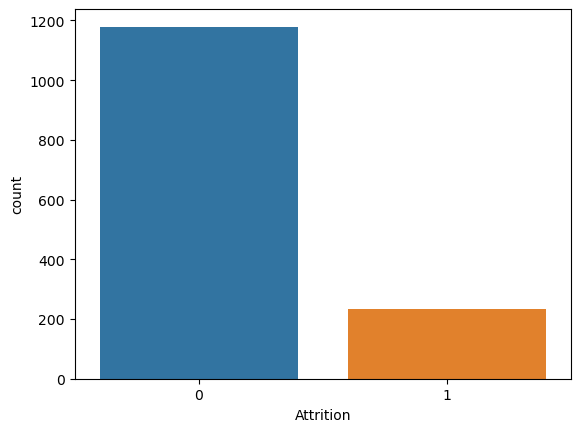

In [341]:
# Check the coding of the dependent variable

# The value coded as "1" is Attrition "Yes"

print(df["Attrition"].value_counts())

sns.countplot(data = df, x = "Attrition")

In [342]:
# Create the regression model
dfz_result = sm.ols('Attrition ~ Age + BusinessTravel + EnvironmentSatisfaction + MonthlyIncome + \
                    JobSatisfaction + YearsAtCompany + C(Gender) + C(Department)', data = dfz).fit()

# Print the regression model summary
dfz_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Attrition   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     14.33
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.87e-23
Time:                        23:24:35   Log-Likelihood:                -333.01
No. Observations:                 769   AIC:                             688.0
Df Residuals:                     758   BIC:                             739.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   0.7837      0.106      7.365      0.000       0.575       0.993
BusinessTravel[T.1]                         0.0685      0.047      1.469      0.142      -0.023       0.160
BusinessTravel[T.2]                         0.2112      0.053      3.958      0.000       0.106       0.316
C(Gender)[T.Male]                           0.0470      0.028      1.683      0.093      -0.008       0.102
C(Department)[T.Research & Development]    -0.1130      0.069     -1.647      0.100      -0.248       0.022
C(Department)[T.Sales]                     -0.0064      0.072     -0.089      0.929      -0.147       0.134
Age                                        -0.0056      0.002     -3.392      0.001      -0.009      -0.002
EnvironmentSatisfaction                    -0.0468      0.012     -3.827      0.000      -0.071      -0.023
MonthlyIncome                           -1.265e-05    4.4e-06     -2.876      0.004   -2.13e-05   -4.02e-06
JobSatisfaction                            -0.0469      0.013     -3.741      0.000      -0.072      -0.022
YearsAtCompany                             -0.0322      0.006     -5.036      0.000      -0.045      -0.020
==============================================================================
Omnibus:                      106.714   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.447
Skew:                           1.094   Prob(JB):                     4.78e-34
Kurtosis:                       2.932   Cond. No.                     5.83e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [344]:
# Create the another regression model with original data with all outliers present

df_result = sm.ols('Attrition ~ Age + BusinessTravel + EnvironmentSatisfaction + MonthlyIncome + \
                    JobSatisfaction + YearsAtCompany + C(Gender) + C(Department)', data = df).fit()

# print the regression model summary

df_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Attrition   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     14.76
Date:                Mon, 08 May 2023   Prob (F-statistic):           3.00e-25
Time:                        23:24:55   Log-Likelihood:                -533.49
No. Observations:                1412   AIC:                             1089.
Df Residuals:                    1401   BIC:                             1147.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   0.5419      0.076      7.113      0.000       0.392       0.691
BusinessTravel[T.1]                         0.0691      0.032      2.188      0.029       0.007       0.131
BusinessTravel[T.2]                         0.1753      0.037      4.796      0.000       0.104       0.247
C(Gender)[T.Male]                           0.0257      0.019      1.328      0.184      -0.012       0.064
C(Department)[T.Research & Development]    -0.0595      0.048     -1.249      0.212      -0.153       0.034
C(Department)[T.Sales]                      0.0180      0.049      0.365      0.715      -0.079       0.115
Age                                        -0.0041      0.001     -3.434      0.001      -0.006      -0.002
EnvironmentSatisfaction                    -0.0357      0.009     -4.108      0.000      -0.053      -0.019
MonthlyIncome                           -5.923e-06   2.63e-06     -2.251      0.025   -1.11e-05   -7.62e-07
JobSatisfaction                            -0.0396      0.009     -4.621      0.000      -0.056      -0.023
YearsAtCompany                             -0.0078      0.002     -3.717      0.000      -0.012      -0.004
==============================================================================
Omnibus:                      343.419   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.303
Skew:                           1.559   Prob(JB):                    3.02e-138
Kurtosis:                       4.020   Cond. No.                     7.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [345]:
# Comparing the two models there is not much difference from removing outliers

In [346]:
# Create another regression model

dfz_result = sm.ols('Attrition ~ Age + BusinessTravel + MonthlyIncome + YearsAtCompany', data = dfz).fit()

# Print the regression model summary

dfz_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Attrition   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     18.76
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.29e-17
Time:                        23:25:00   Log-Likelihood:                -355.02
No. Observations:                 769   AIC:                             722.0
Df Residuals:                     763   BIC:                             749.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4947      0.071      6.968      0.000       0.355       0.634
BusinessTravel[T.1]     0.0771      0.048      1.612      0.107      -0.017       0.171
BusinessTravel[T.2]     0.2238      0.055      4.095      0.000       0.116       0.331
Age                    -0.0064      0.002     -3.795      0.000      -0.010      -0.003
MonthlyIncome       -9.625e-06   4.44e-06     -2.167      0.031   -1.83e-05   -9.07e-07
YearsAtCompany         -0.0353      0.007     -5.416      0.000      -0.048      -0.023
==============================================================================
Omnibus:                      124.009   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.156
Skew:                           1.215   Prob(JB):                     8.42e-42
Kurtosis:                       3.010   Cond. No.                     3.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Attrition
0    5261.003289
1    3654.254658
Name: MonthlyIncome, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

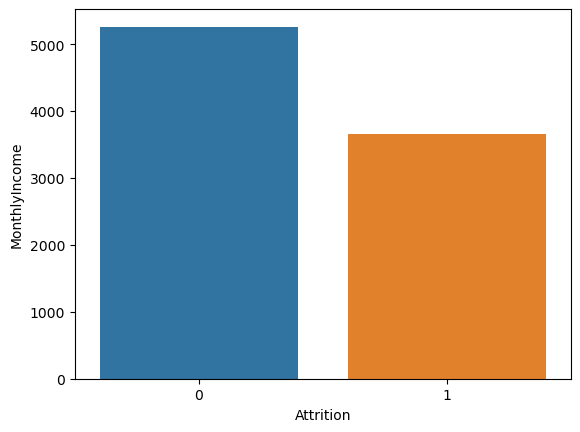

In [347]:
# Even though it looks like there is large difference in monthly income from those that stayed and left

# Increasing salary only decreased the attrition were limitedly. The coefficient is very small.

print(dfz["MonthlyIncome"].groupby(dfz["Attrition"]).mean())


sns.barplot(data = dfz, x = "Attrition", y = "MonthlyIncome", ci = None)

Attrition
0    1.062500
1    1.254658
Name: BusinessTravel, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='BusinessTravel'>

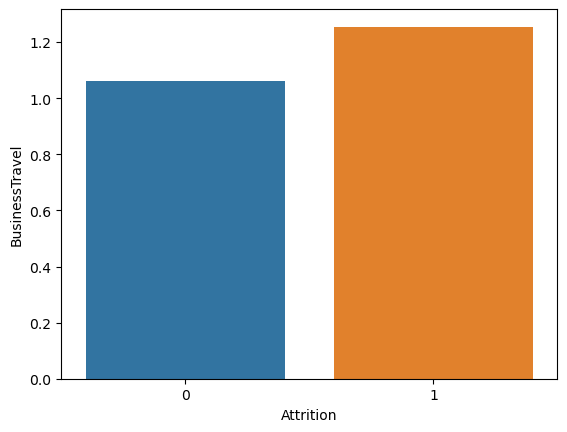

In [170]:
print(dfz["BusinessTravel"].groupby(dfz["Attrition"]).mean())

sns.barplot(data = dfz, x = "Attrition", y = "BusinessTravel", ci = None)

In [348]:
# Creating the model

mod1 = sm.logit('Attrition ~ Age + BusinessTravel + EnvironmentSatisfaction + MonthlyIncome + \
                    JobSatisfaction + YearsAtCompany', data=dfz).fit()

mod1.summary()

Optimization terminated successfully.
         Current function value: 0.430095
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  769
Model:                          Logit   Df Residuals:                      761
Method:                           MLE   Df Model:                            7
Date:                Mon, 08 May 2023   Pseudo R-squ.:                  0.1618
Time:                        23:26:01   Log-Likelihood:                -330.74
converged:                       True   LL-Null:                       -394.58
Covariance Type:            nonrobust   LLR p-value:                 1.919e-24
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.4463      0.639      3.827      0.000       1.193       3.699
BusinessTravel[T.1]         0.6273      0.397      1.580      0.114      -0.151       1.406
BusinessTravel[T.2]         1.6180      0.429      3.769      0.000       0.777       2.459
Age                        -0.0412      0.012     -3.360      0.001      -0.065      -0.017
EnvironmentSatisfaction    -0.3404      0.087     -3.893      0.000      -0.512      -0.169
MonthlyIncome              -0.0001   4.38e-05     -3.163      0.002      -0.000   -5.27e-05
JobSatisfaction            -0.3544      0.089     -3.971      0.000      -0.529      -0.179
YearsAtCompany             -0.2868      0.057     -5.011      0.000      -0.399      -0.175
===========================================================================================
"""

In [351]:
# Create a dataframe with the variable names, OR's and p-values

# np.exp >> calculate the exponential of a given value

dfz_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

# Pull the pvalues directly from the model

dfz_odds["pvalue"] = mod1.pvalues

# Create a variable to quickly determine sig

dfz_odds["Sig"] = np.where(dfz_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

# Print new dataset

dfz_odds

,OR,pvalue,Sig
Intercept,11.545673,1.296525e-04,Sig
BusinessTravel[T.1],1.872527,1.142212e-01,Not Sig
BusinessTravel[T.2],5.042965,1.639399e-04,Sig
Age,0.959636,7.784144e-04,Sig
EnvironmentSatisfaction,0.711521,9.910085e-05,Sig
MonthlyIncome,0.999861,1.561744e-03,Sig
JobSatisfaction,0.701617,7.146748e-05,Sig
YearsAtCompany,0.750699,5.409115e-07,Sig


In [352]:
# Percent change = OR minus 1 multiplied by 100

dfz_odds["Pct Change"] = (dfz_odds["OR"] - 1) * 100

dfz_odds

,OR,pvalue,Sig,Pct Change
Intercept,11.545673,1.296525e-04,Sig,1054.567327
BusinessTravel[T.1],1.872527,1.142212e-01,Not Sig,87.252734
BusinessTravel[T.2],5.042965,1.639399e-04,Sig,404.296503
Age,0.959636,7.784144e-04,Sig,-4.036381
EnvironmentSatisfaction,0.711521,9.910085e-05,Sig,-28.847946
MonthlyIncome,0.999861,1.561744e-03,Sig,-0.013861
JobSatisfaction,0.701617,7.146748e-05,Sig,-29.838288
YearsAtCompany,0.750699,5.409115e-07,Sig,-24.930118


In [365]:
# If probability is greater than 50% > we classify this individual as having the outcome

mod1.predict({
    'BusinessTravel': 2, 
    'Age': 20, 
    'EnvironmentSatisfaction': 3, 
    'MonthlyIncome': 3000, 
    'JobSatisfaction': 2, 
    'YearsAtCompany': 5})

0    0.416026
dtype: float64

In [366]:
# If probability is greater than 50% > we classify this individual as having the outcome

mod1.predict({
    'BusinessTravel': 2, 
    'Age': 30, 
    'EnvironmentSatisfaction': 3, 
    'MonthlyIncome': 4000, 
    'JobSatisfaction': 1, 
    'YearsAtCompany': 5})

0    0.369266
dtype: float64

In [367]:
# If probability is greater than 50% > we classify this individual as having the outcome

mod1.predict({
    'BusinessTravel': 2, 
    'Age': 65, 
    'EnvironmentSatisfaction': 3, 
    'MonthlyIncome': 4000, 
    'JobSatisfaction': 1, 
    'YearsAtCompany': 10})


0    0.031949
dtype: float64

In [368]:
# Look like business travel has the greatest effect on attrition. Keep all things equal and increasing bussiness
# Travel frequency will likely make the person leave the company
# Overall there the data was not even weakly correlated with attrition.
# No single data point had correlation greater > 0.30 to attrition
# Frequent business travel seems to have the one that had the highest degree of effect on attrition
# Its statistical significnat wiht p < 0.05 and increased the attrition with increasing travel, coeff 0.1708

# Gender, department were not statistical significant in affecting attrition

# Increased age, environment satisfaction, job satisfication and years at company decreased attrition
# They were statistical significant with p < 0.05
# Overall employees would benefit and company can improve attrition if decreasing how often employees travel
# Incereasing employee salary does will not improve attrition

In [369]:
dfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Age                                           769 non-null    int64  
 1   Attrition                                     769 non-null    int64  
 2   BusinessTravel                                769 non-null    object 
 3   Department                                    769 non-null    object 
 4   DistanceFromHome                              769 non-null    int64  
 5   Education                                     769 non-null    int64  
 6   EducationField                                769 non-null    object 
 7   EmployeeNumber                                769 non-null    int64  
 8   EnvironmentSatisfaction                       769 non-null    int64  
 9   Gender                                        769 non-null    obj

# <font color=GOLDENROD>Data Visulization </font>

<AxesSubplot:xlabel='Age', ylabel='Density'>

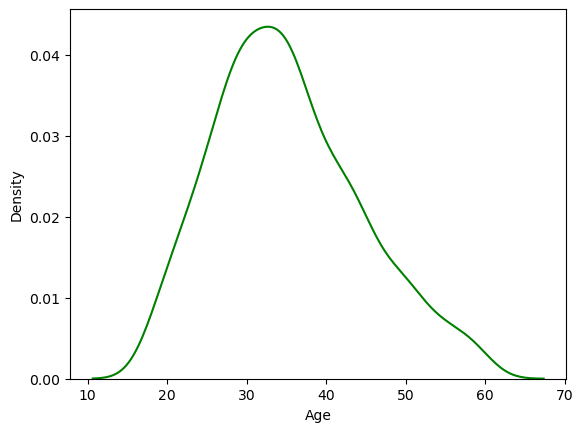

In [370]:
# Simple density plot to show the distribution of age at company

sns.kdeplot(dfz['Age'], shade = False, color = "green")

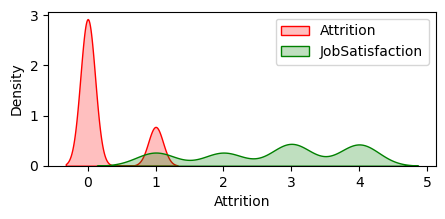

In [372]:
# Plotting two density plots in the same figure 

plt.figure(figsize=(5,2)) # change the figure size

sns.kdeplot(dfz['Attrition'], shade = True, color = "red", label = "Attrition")
sns.kdeplot(dfz['JobSatisfaction'], shade = True, color = "green", label = "JobSatisfaction")

plt.legend() # add a legend 
plt.show() # show both plots in the same figure 

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

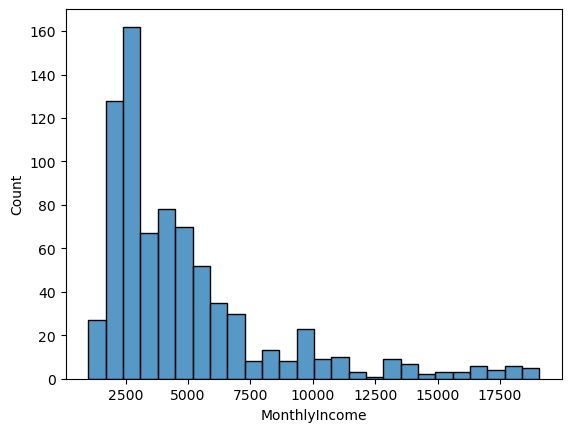

In [187]:
# Monthly Income buckets

# As we can see most of the employees fall in the $3000-$3999 salary group 


sns.histplot(dfz["MonthlyIncome"], kde = False)

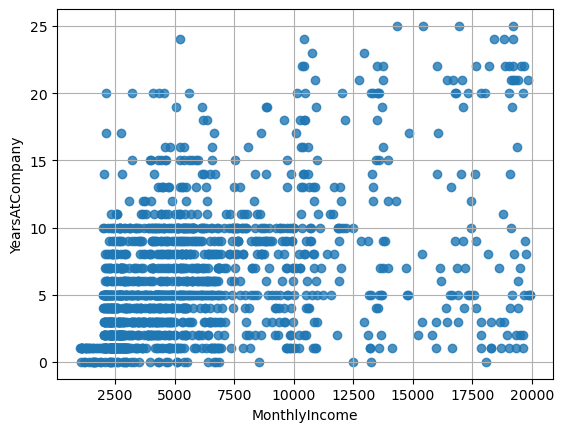

In [373]:
sns.regplot(x = df["MonthlyIncome"], y = df["YearsAtCompany"], fit_reg = False)

plt.grid()

<AxesSubplot:xlabel='MonthlyIncome'>

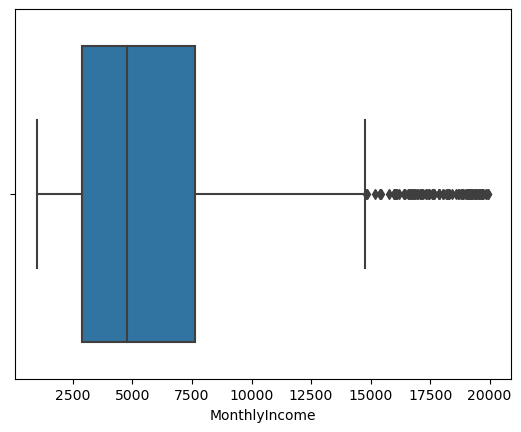

In [374]:
# Creating a boxplot to show the distribution of monthly income

sns.boxplot(x = df["MonthlyIncome"])

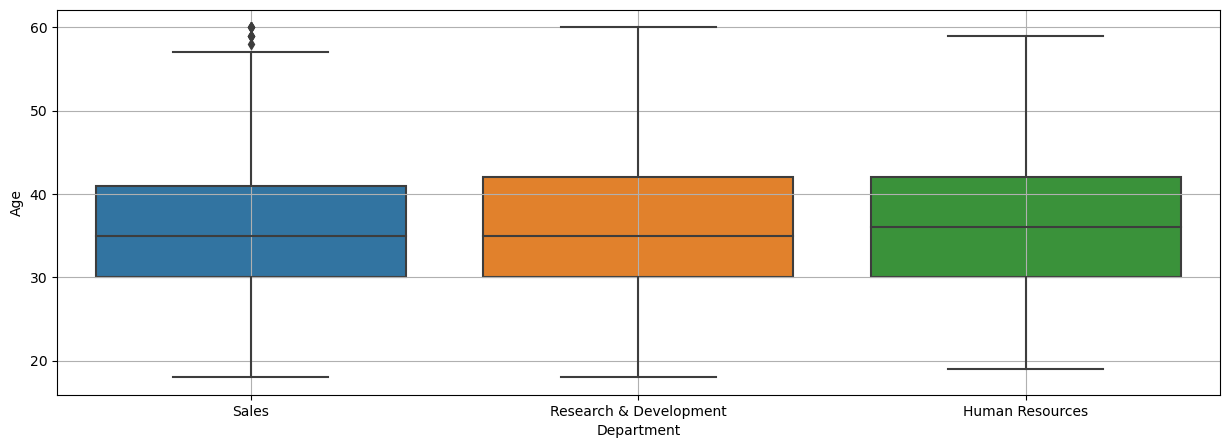

In [375]:
# Creating a series of boxplots to show the distribution of attack across groups

plt.figure(figsize=(15,5)) # adjust the size of the output plot

sns.boxplot(x = df["Department"], y = df["Age"])

plt.grid() # add grid lines to plot

Text(0.5, 1.0, 'Average Monthly Income of Job Role')

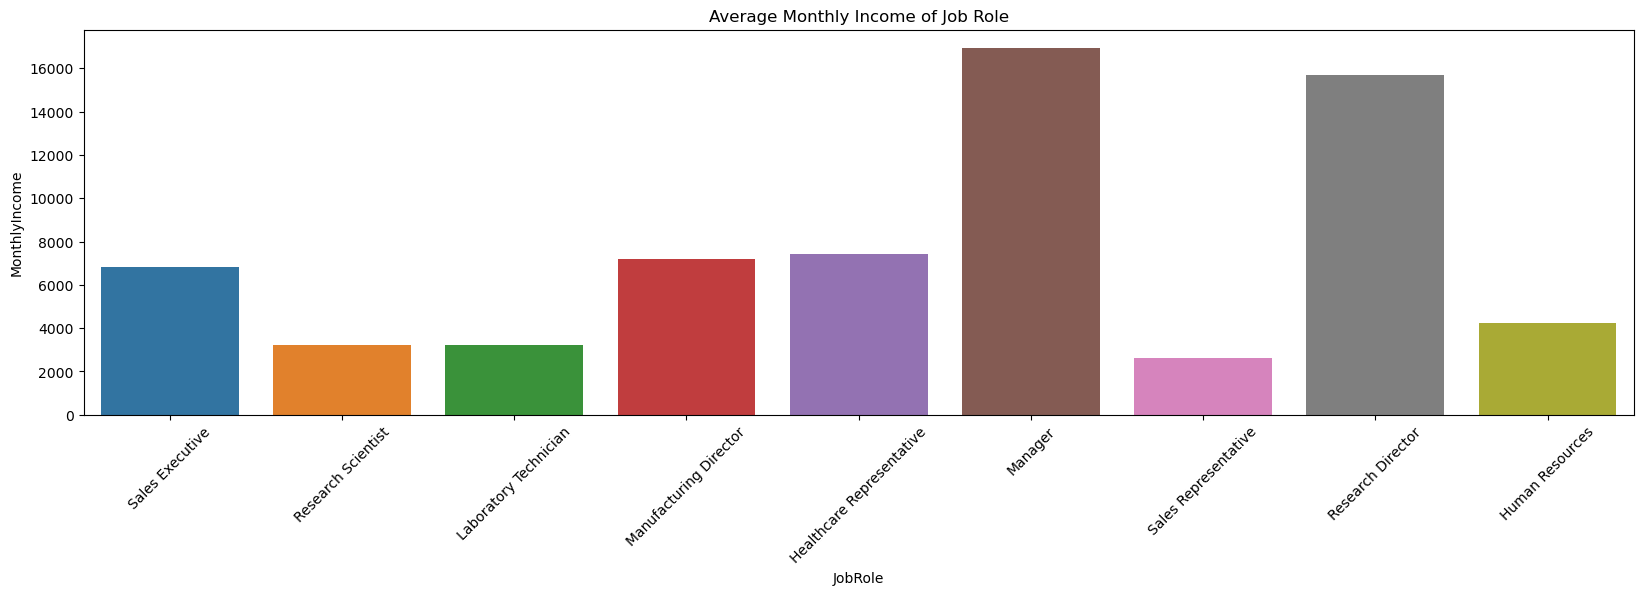

In [376]:
# Create a barplot to show average monthly income across job role

plt.figure(figsize=(20,5))

sns.barplot(data = df, x = "JobRole", y = "MonthlyIncome", ci = None)

plt.xticks(rotation = 45)
plt.title('Average Monthly Income of Job Role')

Text(0.5, 1.0, 'Average Monthly Income by Education')

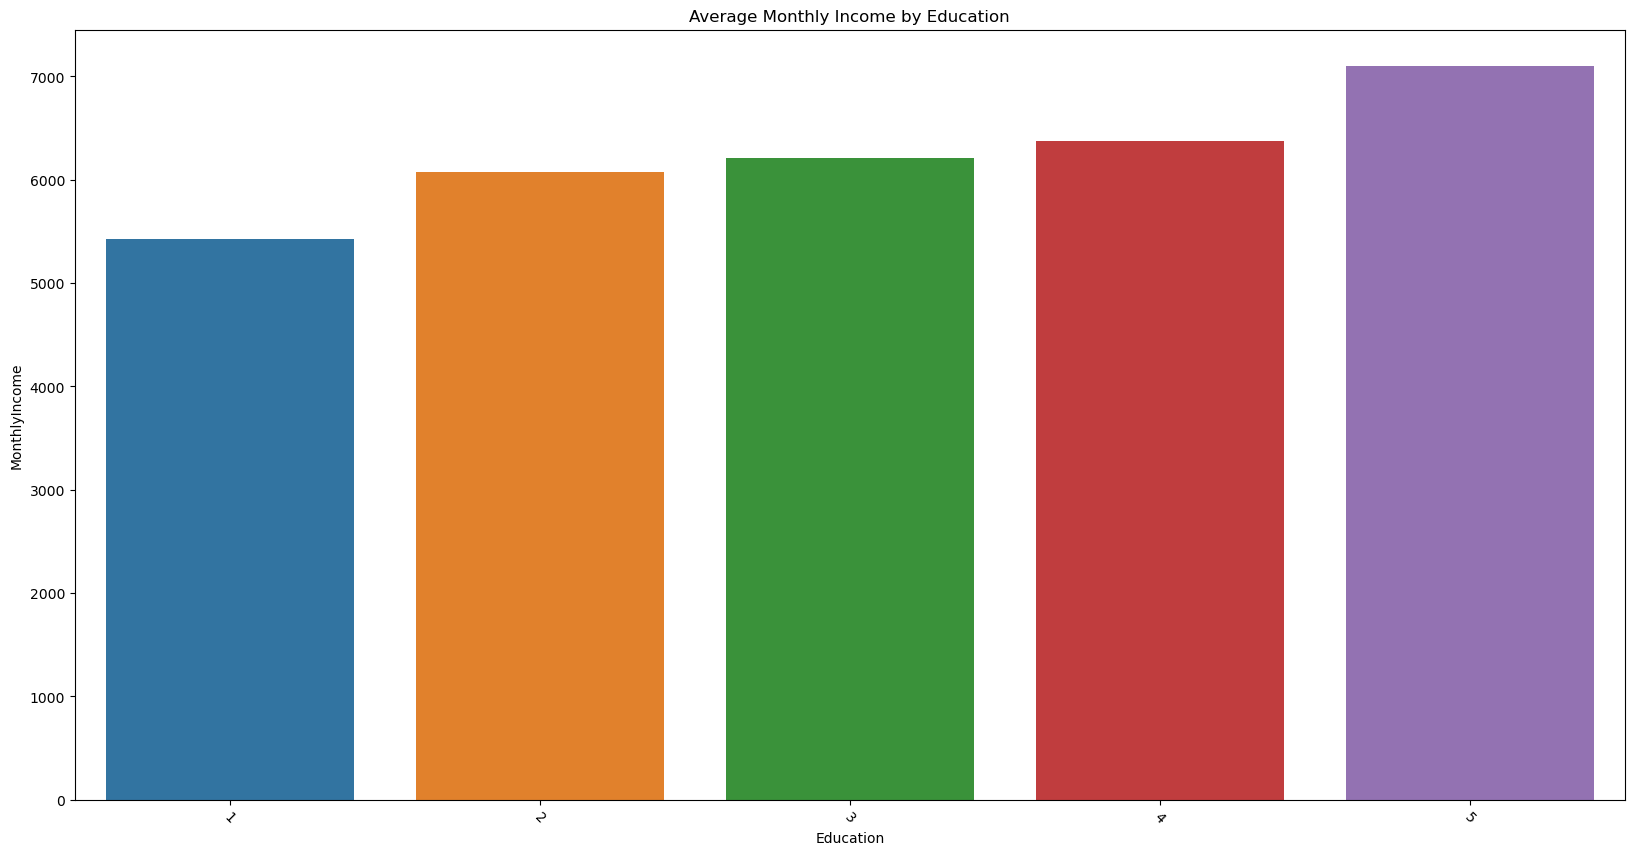

In [377]:
# Create a barplot showing the average monthly income by education 

plt.figure(figsize=(20,10))

sns.barplot(data = df, x = "Education", y = "MonthlyIncome", ci = None)

plt.xticks(rotation = -45)
plt.title('Average Monthly Income by Education')

Text(0.5, 1.0, 'Attrition by Job Satisfaction')

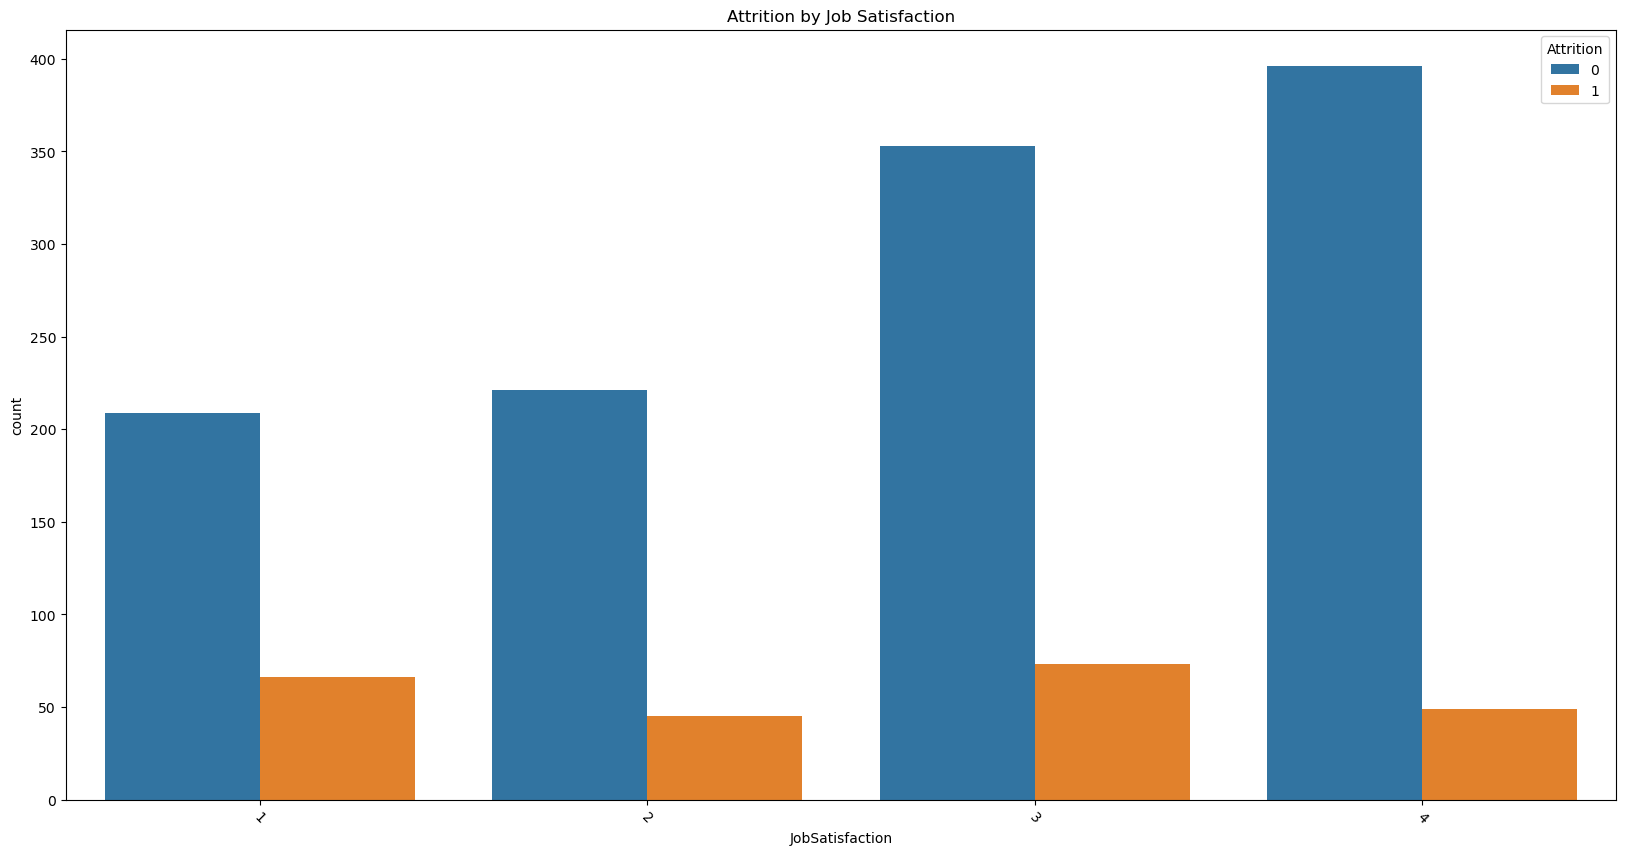

In [378]:
# Attrition by Job Satisfaction

plt.figure(figsize=(20,10))

sns.countplot(data = df, x = "JobSatisfaction", hue = "Attrition")

plt.xticks(rotation = -45)
plt.title('Attrition by Job Satisfaction')